<a href="https://colab.research.google.com/github/MehrdadDastouri/distribution_analysis/blob/main/distribution_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Table 3: Number of Fly Eggs


,Number of Fly Eggs,Observed Frequency,EXP-ZTPD,EXP-ZTPLD,EXP-ZTDLD
0,1.0,22.0,15.3,26.8,24.9
1,2.0,18.0,21.9,19.8,20.4
2,3.0,18.0,20.8,13.9,14.9
3,4.0,11.0,14.9,9.5,10.2
4,5.0,9.0,8.5,6.4,6.7
5,6.0,6.0,4.1,4.2,4.2
6,7.0,3.0,1.7,2.7,2.7
7,8.0,0.0,0.6,1.7,1.6
8,9.0,1.0,0.2,1.1,1.0
Total,45.0,88.0,88.0,86.1,86.6


,,EXP-ZTPD,EXP-ZTPLD,EXP-ZTDLD
0,ML Estimate,θ̂ = 2.8604,θ̂ = 0.7186,θ̂ = 0.6042
1,χ²,11.150,6.071,4.566
2,d.f.,7,7,7
3,P-value,0.1322,0.5314,0.7127


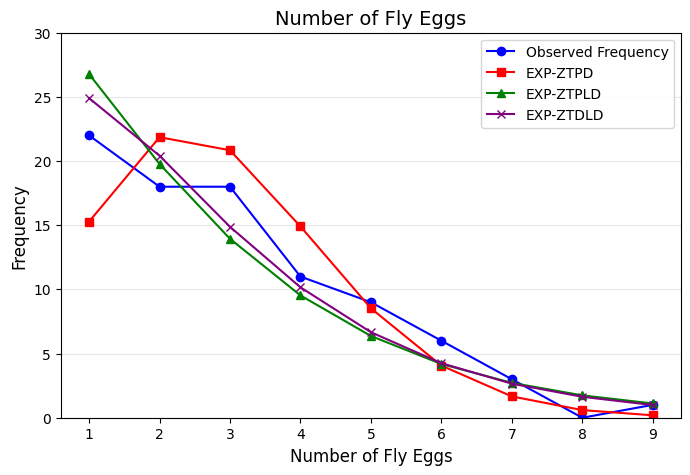


Table 4: Number of Times Hares Caught


,Number of Times Hares Caught,Observed Frequency,EXP-ZTPD,EXP-ZTPLD,EXP-ZTDLD
0,1.0,122.0,115.9,124.8,122.7
1,2.0,50.0,57.4,46.8,49.2
2,3.0,18.0,18.9,17.1,17.5
3,4.0,4.0,4.7,6.1,5.9
4,5.0,4.0,0.9,2.2,1.9
Total,15.0,198.0,197.8,197.0,197.2


,,EXP-ZTPD,EXP-ZTPLD,EXP-ZTDLD
0,ML Estimate,θ̂ = 0.9906,θ̂ = 2.1831,θ̂ = 1.3189
1,χ²,11.565,2.648,3.004
2,d.f.,3,3,3
3,P-value,0.0090,0.4491,0.3910


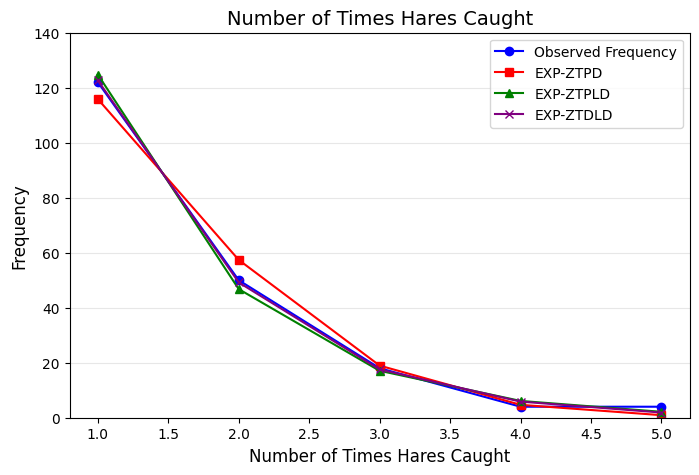


Table 5: Number of Migrants


,Number of Migrants,Observed Frequency,EXP-ZTPD,EXP-ZTPLD,EXP-ZTDLD
0,1.0,375.0,354.0,379.0,372.9
1,2.0,143.0,167.7,137.2,144.3
2,3.0,49.0,53.0,48.4,49.7
3,4.0,17.0,12.5,16.8,16.0
4,5.0,2.0,2.4,5.7,5.0
5,6.0,2.0,0.4,1.9,1.5
6,7.0,1.0,0.1,0.6,0.4
7,8.0,1.0,0.0,0.2,0.1
Total,36.0,590.0,590.1,589.8,589.9


,,EXP-ZTPD,EXP-ZTPLD,EXP-ZTDLD
0,ML Estimate,θ̂ = 0.9475,θ̂ = 2.2848,θ̂ = 1.3546
1,χ²,195.732,5.812,8.692
2,d.f.,6,6,6
3,P-value,0.0000,0.4446,0.1917


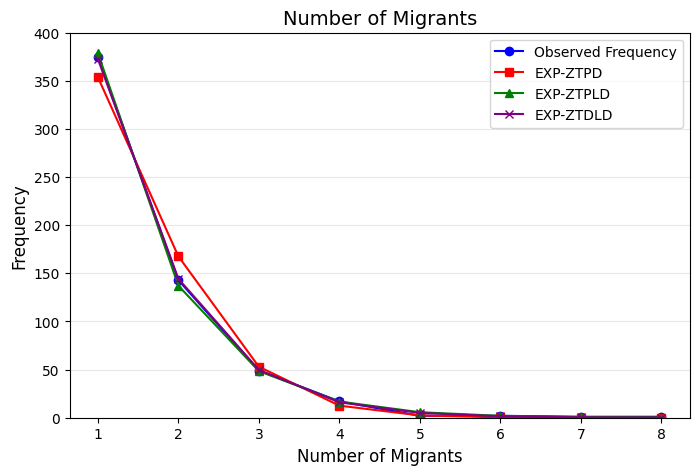

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import factorial
from scipy.stats import chi2

# تعریف توابع توزیع
# ZTPD (توزیع پواسون بدون صفر)
def ztpd_pmf(x, theta):
    return (np.exp(-theta) * theta**x / factorial(x)) / (1 - np.exp(-theta))

# ZTPLD (توزیع پواسون-لیندلی بدون صفر)
def ztpld_pmf(x, theta):
    numerator = theta**2 * (x + theta + 2)
    denominator = (theta**2 + 3 * theta + 1) * (theta + 1)**x
    return numerator / denominator

# ZTDLD (توزیع لیندلی گسسته بدون صفر)
def ztdld_pmf(x, theta):
    numerator = (np.exp(theta) - 1)**2 * (1 + x)
    denominator = (2 * np.exp(theta) - 1) * (np.exp(theta))**x
    return numerator / denominator

# داده‌های مشاهده‌شده برای هر جدول
data_table_3 = [22, 18, 18, 11, 9, 6, 3, 0, 1]
data_table_4 = [122, 50, 18, 4, 4]
data_table_5 = [375, 143, 49, 17, 2, 2, 1, 1]

# مقادیر θ (ML Estimate) برای هر جدول
theta_table_3 = {'ztpd': 2.8604, 'ztpld': 0.7186, 'ztdld': 0.6042}
theta_table_4 = {'ztpd': 0.9906, 'ztpld': 2.1831, 'ztdld': 1.3189}
theta_table_5 = {'ztpd': 0.9475, 'ztpld': 2.2848, 'ztdld': 1.3546}

# تابع محاسبه آماره χ² و مقدار p-value
def calculate_chi_square(observed, expected):
    chi_square = sum([(o - e)**2 / e for o, e in zip(observed, expected) if e > 0])
    df = len(observed) - 2  # درجه آزادی
    p_value = 1 - chi2.cdf(chi_square, df)
    return chi_square, df, p_value

# تابع محاسبه مقادیر پیش‌بینی‌شده برای هر توزیع
def compute_expected_values(data, theta_values):
    n = len(data)
    total = sum(data)
    x_values = range(1, n + 1)

    # محاسبه مقادیر پیش‌بینی‌شده برای هر توزیع
    exp_ztpd = [ztpd_pmf(x, theta_values['ztpd']) * total for x in x_values]
    exp_ztpld = [ztpld_pmf(x, theta_values['ztpld']) * total for x in x_values]
    exp_ztdld = [ztdld_pmf(x, theta_values['ztdld']) * total for x in x_values]

    return exp_ztpd, exp_ztpld, exp_ztdld

# محاسبه مقادیر پیش‌بینی‌شده برای هر جدول
exp_3_ztpd, exp_3_ztpld, exp_3_ztdld = compute_expected_values(data_table_3, theta_table_3)
exp_4_ztpd, exp_4_ztpld, exp_4_ztdld = compute_expected_values(data_table_4, theta_table_4)
exp_5_ztpd, exp_5_ztpld, exp_5_ztdld = compute_expected_values(data_table_5, theta_table_5)

# محاسبه آماره χ² و مقدار p-value برای هر جدول
chi_square_3 = {
    'ztpd': calculate_chi_square(data_table_3, exp_3_ztpd),
    'ztpld': calculate_chi_square(data_table_3, exp_3_ztpld),
    'ztdld': calculate_chi_square(data_table_3, exp_3_ztdld)
}

chi_square_4 = {
    'ztpd': calculate_chi_square(data_table_4, exp_4_ztpd),
    'ztpld': calculate_chi_square(data_table_4, exp_4_ztpld),
    'ztdld': calculate_chi_square(data_table_4, exp_4_ztdld)
}

chi_square_5 = {
    'ztpd': calculate_chi_square(data_table_5, exp_5_ztpd),
    'ztpld': calculate_chi_square(data_table_5, exp_5_ztpld),
    'ztdld': calculate_chi_square(data_table_5, exp_5_ztdld)
}

# ایجاد جداول نتایج
def create_styled_table(data, exp_ztpd, exp_ztpld, exp_ztdld, theta_values, chi_square_values, title, x_label):
    # جدول اصلی داده‌ها
    df = pd.DataFrame({
        x_label: range(1, len(data) + 1),
        'Observed Frequency': data,
        'EXP-ZTPD': [round(x, 1) for x in exp_ztpd],
        'EXP-ZTPLD': [round(x, 1) for x in exp_ztpld],
        'EXP-ZTDLD': [round(x, 1) for x in exp_ztdld]
    })
    # افزودن ردیف مجموع
    df.loc['Total'] = df.sum(numeric_only=True)

    # جدول آماری
    stats = pd.DataFrame({
        '': ['ML Estimate', 'χ²', 'd.f.', 'P-value'],
        'EXP-ZTPD': [f'θ̂ = {theta_values["ztpd"]}',
                     f'{chi_square_values["ztpd"][0]:.3f}',
                     f'{chi_square_values["ztpd"][1]}',
                     f'{chi_square_values["ztpd"][2]:.4f}'],
        'EXP-ZTPLD': [f'θ̂ = {theta_values["ztpld"]}',
                      f'{chi_square_values["ztpld"][0]:.3f}',
                      f'{chi_square_values["ztpld"][1]}',
                      f'{chi_square_values["ztpld"][2]:.4f}'],
        'EXP-ZTDLD': [f'θ̂ = {theta_values["ztdld"]}',
                      f'{chi_square_values["ztdld"][0]:.3f}',
                      f'{chi_square_values["ztdld"][1]}',
                      f'{chi_square_values["ztdld"][2]:.4f}']
    })

    return df, stats

# رسم نمودارها
def plot_fitted_data(observed, exp_ztpd, exp_ztpld, exp_ztdld, title, x_label, y_limit):
    x = np.arange(1, len(observed) + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(x, observed, marker='o', label="Observed Frequency", color='blue', linewidth=1.5, markersize=6)
    plt.plot(x, exp_ztpd, marker='s', label="EXP-ZTPD", color='red', linewidth=1.5, markersize=6)
    plt.plot(x, exp_ztpld, marker='^', label="EXP-ZTPLD", color='green', linewidth=1.5, markersize=6)
    plt.plot(x, exp_ztdld, marker='x', label="EXP-ZTDLD", color='purple', linewidth=1.5, markersize=6)
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    plt.ylim([0, y_limit])
    plt.show()

# ایجاد و نمایش جداول و نمودارها
for i, (data, exp_ztpd, exp_ztpld, exp_ztdld, theta_values, chi_square_values, title, x_label, y_limit) in enumerate([
    (data_table_3, exp_3_ztpd, exp_3_ztpld, exp_3_ztdld, theta_table_3, chi_square_3,
     "Number of Fly Eggs", "Number of Fly Eggs", 30),
    (data_table_4, exp_4_ztpd, exp_4_ztpld, exp_4_ztdld, theta_table_4, chi_square_4,
     "Number of Times Hares Caught", "Number of Times Hares Caught", 140),
    (data_table_5, exp_5_ztpd, exp_5_ztpld, exp_5_ztdld, theta_table_5, chi_square_5,
     "Number of Migrants", "Number of Migrants", 400)
], 1):

    print(f"\nTable {i+2}: {title}")
    df, stats = create_styled_table(data, exp_ztpd, exp_ztpld, exp_ztdld,
                                  theta_values, chi_square_values, title, x_label)
    display(df)  # نمایش جدول داده‌ها
    display(stats)  # نمایش جدول آماری
    plot_fitted_data(data, exp_ztpd, exp_ztpld, exp_ztdld, title, x_label, y_limit)  # نمایش نمودار